# 比较, 掩码, 和布尔操作

想想过滤器，或者筛子，当你想提取、修改、计数那些满足一定条件的元素时，Mask就发挥作用了

## 数数下雨天数

想象你有一个城市一年每天的降雨量的数据集:

In [1]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

The array contains 365 values, giving daily rainfall in inches from January 1 to December 31, 2014.

As a first quick visualization, let's look at the histogram of rainy days, which was generated using Matplotlib (we will explore this tool more fully in [Chapter 4](04.00-Introduction-To-Matplotlib.ipynb)):

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

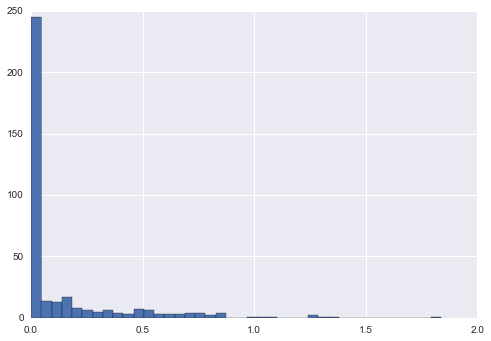

In [3]:
plt.hist(inches, 40);

这个直方图传达了很多信息，我们知道西雅图2014年绝大部分的日子里降水接近于0，但没有告诉我们这年有多少天下雨，下雨天的平均降水量是多少，有多少天雨量超过半英寸。

### 挖掘数据

通常的Python循环遍历比较计数是比较低效的，Numpy提供了更有效的方法，用于回答以上问题。

## 比较操作
NumPy也提供了比较操作符，总共6种标准的比较操作符，比较的结果是布尔类型的数组

In [2]:
x = np.array([1, 2, 3, 4, 5])

In [3]:
x < 3  # less than

array([ True,  True, False, False, False])

In [4]:
x > 3  # greater than

array([False, False, False,  True,  True])

In [5]:
x <= 3  # less than or equal

array([ True,  True,  True, False, False])

In [6]:
x >= 3  # greater than or equal

array([False, False,  True,  True,  True])

In [7]:
x != 3  # not equal

array([ True,  True, False,  True,  True])

In [8]:
x == 3  # equal

array([False, False,  True, False, False])

也支持对复合表达式进行比较操作:

In [9]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

比较操作也有对应的NumPy方法，如表所示

| Operator	    | Equivalent ufunc    || Operator	   | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``==``         |``np.equal``         ||``!=``         |``np.not_equal``     |
|``<``          |``np.less``          ||``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       ||``>=``         |``np.greater_equal`` |

操作也适用于任何维度的数组，例如二维数组:

In [12]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [13]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]], dtype=bool)

每种情况，结果都是布尔数组，NumPy提供了大量的直接模式处理布尔数组。

## 处理布尔数组

Given a Boolean array, there are a host of useful operations you can do.
We'll work with ``x``, the two-dimensional array we created earlier.

In [14]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### 计数

为了计数数组中``True``的项数 , 可以使用``np.count_nonzero`` 方法:

In [15]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

有``8``个元素小于``6``

这里``False``被解释为``0``，``True``被解释为``1``，因此也可以使用``np.sum``方法

In [16]:
np.sum(x < 6)

8

使用``sum()``的好处是可以指定``axis`` :

In [17]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

如果想test是否存在符合某种条件的元素，这两个方法``np.any`` 或 ``np.all``可以使用:

In [18]:
# are there any values greater than 8?
np.any(x > 8)

True

In [19]:
# are there any values less than zero?
np.any(x < 0)

False

In [20]:
# are all values less than 10?
np.all(x < 10)

True

In [21]:
# are all values equal to 6?
np.all(x == 6)

False

``np.all`` and ``np.any`` 这两个方法也可以指定``axis``:

In [22]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True], dtype=bool)

警告：在操作NumPy数组时确保使用的是``np.sum()``, ``np.any()``, 和``np.all()``，而不是 Python内建的 ``sum()``, ``any()``, and ``all()``

### 布尔操作

前面列举了6个比较操作，NumPy将Python的位操作, ``&``, ``|``, ``^``, and ``~``作为布尔类型数组的布尔操作
举例如下:

In [23]:
np.sum((inches > 0.5) & (inches < 1))

29


因此我们知道有29天的降雨量大于0.5英寸和小于1.0英寸

注意前面的括号是必须的，应为Python的按位与操作优先级超过比较运算:

``` python
inches > (0.5 & inches) < 1
```

上面的操作也可以等价为下面的运算:

In [24]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

| Operator	    | Equivalent ufunc    || Operator	    | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``&``          |``np.bitwise_and``   ||&#124;         |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   ||``~``          |``np.bitwise_not``   |

组合使用比较操作、布尔操作和聚合操作，就可以回答以上问题了:

In [10]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## 布尔数组作为掩码

前面是直接在布尔数组上进行聚合操作，更强大的模式是将布尔数组作为掩码，选择数据子集：

In [11]:
x

array([1, 2, 3, 4, 5])

很容易获得布尔数组如下:

In [27]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]], dtype=bool)

将布尔数组作为索引选择元素:

In [28]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

返回一维数组，其中的元素都是掩码为``True``

我们可以进一步操作.
例如对西雅图的天气情况进行统计:

In [29]:
# construct a mask of all rainy days 构建雨天掩码
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262) #构建夏天掩码

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))  #利用掩码选择子集，再进行聚合操作，求中位数
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer])) #求夏天雨水的中位数
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.194881889764
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.850393700787
Median precip on non-summer rainy days (inches): 0.200787401575


通过组合布尔操作、掩码操作、聚合操作我们可以很容易实现一些需求.

为什么NumPy支持掩码操作，而不是一般的filter呢，这可能与底层利用了处理器的向量化指令有关系

## 另外: 比较操作符 and/or 和 操作符 &/|

Python的``and``和``or``是布尔运算，只能操作于布尔变量上，当然Python也会将非``0``的整数作为``True``，因此也可以作用于整数上。而Python的``&``和``|``只能作用于整数，并且是按照``bit``位进行运算，因此这是完全不同的操作，而NumPy认为数组的每个元素类似于每个``bit``位，因此重载了``&``和``|``，这样能理解吗？

In [30]:
bool(42), bool(0)

(True, False)

In [31]:
bool(42 and 0)

False

In [32]:
bool(42 or 0)

True

In [12]:
bin(42)

'0b101010'

In [13]:
bin(59)

'0b111011'

In [35]:
bin(42 & 59)

'0b101010'

In [36]:
bin(42 | 59)

'0b111011'

In [14]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [ ]:
A or B

In [16]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [ ]:
(x > 4) and (x < 8)